In [19]:
import pandas as pd
import cv2 as cv
import json
import matplotlib.pyplot as plt

In [20]:
val_df = pd.read_csv('val_merged_with_crops.csv')
val_df

image_id  category_id   area                              bbox  iscrowd  \
0          260            4  14029  [266.71, 330.25, 204.03, 105.25]        0   
1          261            4  12875      [421.58, 174, 126.81, 183.5]        0   
2          261            4   8519    [266.4, 368.92, 204.19, 66.83]        0   
3          261            4  23941  [252.36, 178.12, 161.26, 208.13]        0   
4          261            4   1528       [317.23, 176, 91.16, 53.77]        0   
...        ...          ...    ...                               ...      ...   
6585       951            7    509     [379.97, 292.5, 26.18, 29.91]        0   
6586       951            7   2210     [592.25, 255.5, 33.51, 74.25]        0   
6587       951            7   1750    [573.25, 384.25, 74.62, 45.75]        0   
6588       951            7   1438       [555.75, 353.25, 74.26, 35]        0   
6589       466           28   1643     [426.86, 378.23, 49.2, 57.69]        0   

      occluded                      attributes  group_id  width  height  \
0        False  {'occluded': ['Not-Occluded']}         0   1280     720   
1         True      {'occluded': ['Occluded']}         0   1280     720   
2         True      {'occluded': ['Occluded']}         0   1280     720   
3        False  {'occluded': ['Not-Occluded']}         0   1280     720   
4         True      {'occluded': ['Occluded']}         0   1280     720   
...        ...                             ...       ...    ...     ...   
6585      True      {'occluded': ['Occluded']}         0   1280     720   
6586     False  {'occluded': ['Not-Occluded']}         0   1280     720   
6587     False  {'occluded': ['Not-Occluded']}         0   1280     720   
6588     False  {'occluded': ['Not-Occluded']}         0   1280     720   
6589     False  {'occluded': ['Not-Occluded']}         0   1280     720   

                             file_name  license  flickr_url  coco_url  \
0     20220221-203649.672177-scout.png        0         NaN       NaN   
1     20220221-203636.896133-scout.png        0         NaN       NaN   
2     20220221-203636.896133-scout.png        0         NaN       NaN   
3     20220221-203636.896133-scout.png        0         NaN       NaN   
4     20220221-203636.896133-scout.png        0         NaN       NaN   
...                                ...      ...         ...       ...   
6585  20220221-173130.219165-scout.png        0         NaN       NaN   
6586  20220221-173130.219165-scout.png        0         NaN       NaN   
6587  20220221-173130.219165-scout.png        0         NaN       NaN   
6588  20220221-173130.219165-scout.png        0         NaN       NaN   
6589  20220221-174036.038054-scout.png        0         NaN       NaN   

      date_captured       category_name  supercategory    crop_file_name  
0                 0      nomagic_boxers            NaN     cropped_0.png  
1                 0      nomagic_boxers            NaN     cropped_1.png  
2                 0      nomagic_boxers            NaN     cropped_2.png  
3                 0      nomagic_boxers            NaN     cropped_3.png  
4                 0      nomagic_boxers            NaN     cropped_4.png  
...             ...                 ...            ...               ...  
6585              0  nomagic_toothpaste            NaN  cropped_6585.png  
6586              0  nomagic_toothpaste            NaN  cropped_6586.png  
6587              0  nomagic_toothpaste            NaN  cropped_6587.png  
6588              0  nomagic_toothpaste            NaN  cropped_6588.png  
6589              0                item            NaN  cropped_6589.png  

[6590 rows x 18 columns]

In [131]:
small_img = val_df[['area', 'bbox', 'file_name', 'crop_file_name', 'category_name', 'attributes']]
small_img = small_img.loc[(small_img['area'] < 700)]
small_img = small_img.loc[(small_img['area'] > 0)]
print(len(small_img))
small_img

1657


area                            bbox                         file_name  \
7      541  [438.87, 338.12, 76.13, 40.42]  20220221-203555.903974-scout.png   
10     101       [406.8, 385, 9.03, 33.61]  20220221-203555.903974-scout.png   
11     350   [361.94, 356.62, 53.64, 25.5]  20220221-203555.903974-scout.png   
13     235  [425.53, 185.62, 36.85, 14.26]  20220221-203555.903974-scout.png   
15     591    [333.2, 177.25, 78.5, 35.85]  20220221-203555.903974-scout.png   
...    ...                             ...                               ...   
6571   485   [643.77, 234.7, 14.54, 49.48]  20220221-173554.716605-scout.png   
6573   162  [458.52, 360.25, 20.68, 11.27]  20220221-173554.716605-scout.png   
6579   129  [304.04, 326.58, 11.63, 21.58]  20220221-173243.795418-scout.png   
6584   511  [379.02, 292.19, 25.85, 29.28]  20220221-173140.363105-scout.png   
6585   509   [379.97, 292.5, 26.18, 29.91]  20220221-173130.219165-scout.png   

        crop_file_name       category_name                  attributes  
7        cropped_7.png      nomagic_boxers  {'occluded': ['Occluded']}  
10      cropped_10.png      nomagic_boxers  {'occluded': ['Occluded']}  
11      cropped_11.png      nomagic_boxers  {'occluded': ['Occluded']}  
13      cropped_13.png      nomagic_boxers  {'occluded': ['Occluded']}  
15      cropped_15.png      nomagic_boxers  {'occluded': ['Occluded']}  
...                ...                 ...                         ...  
6571  cropped_6571.png  nomagic_toothpaste  {'occluded': ['Occluded']}  
6573  cropped_6573.png  nomagic_toothpaste  {'occluded': ['Occluded']}  
6579  cropped_6579.png  nomagic_toothpaste  {'occluded': ['Occluded']}  
6584  cropped_6584.png  nomagic_toothpaste  {'occluded': ['Occluded']}  
6585  cropped_6585.png  nomagic_toothpaste  {'occluded': ['Occluded']}  

[1657 rows x 6 columns]

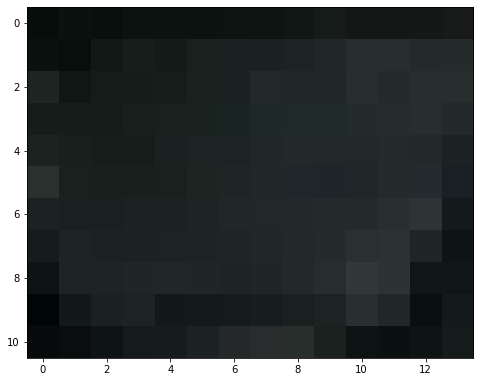

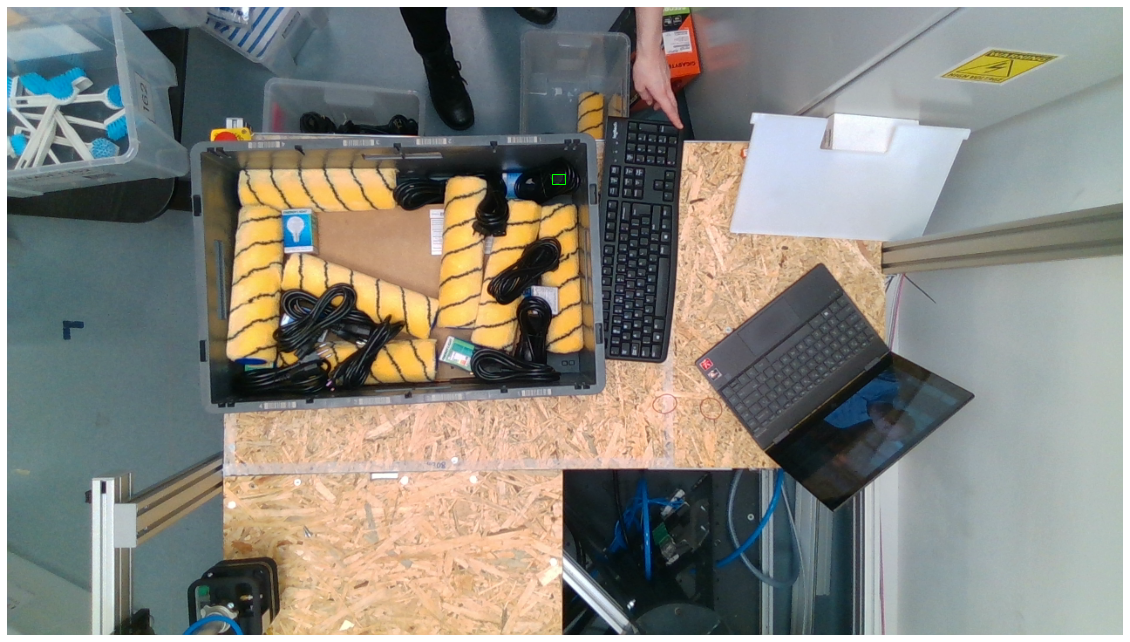

nomagic_digitec_cables


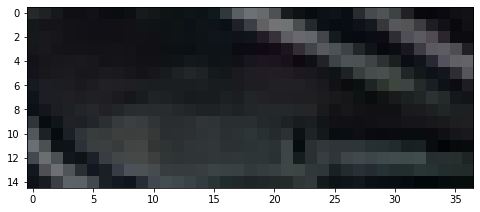

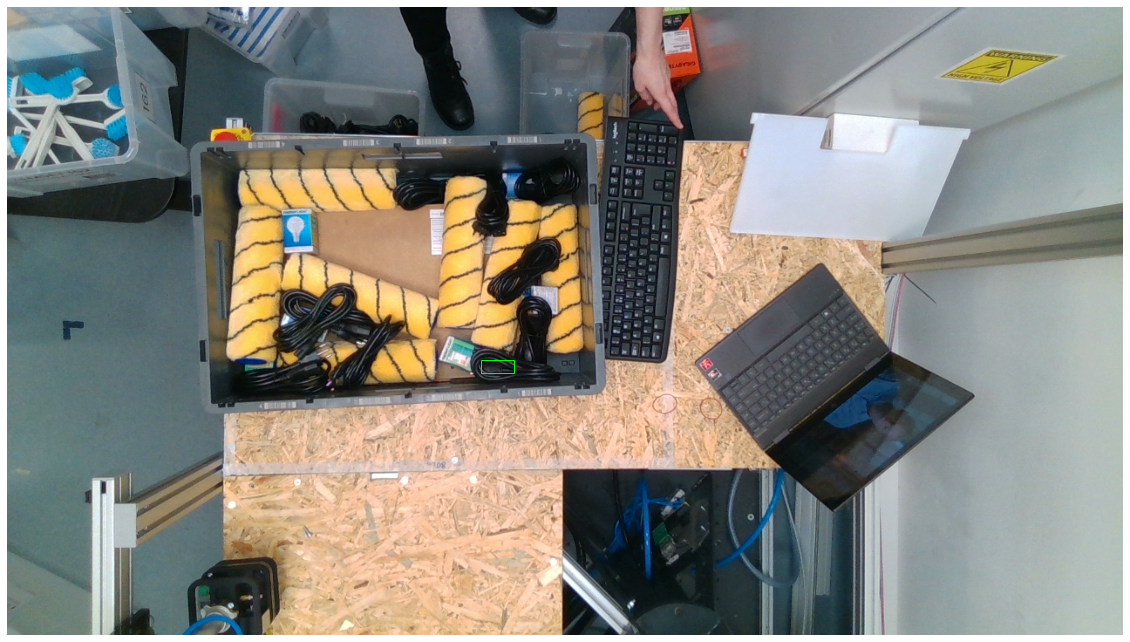

nomagic_digitec_cables


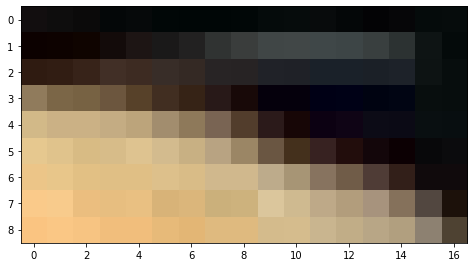

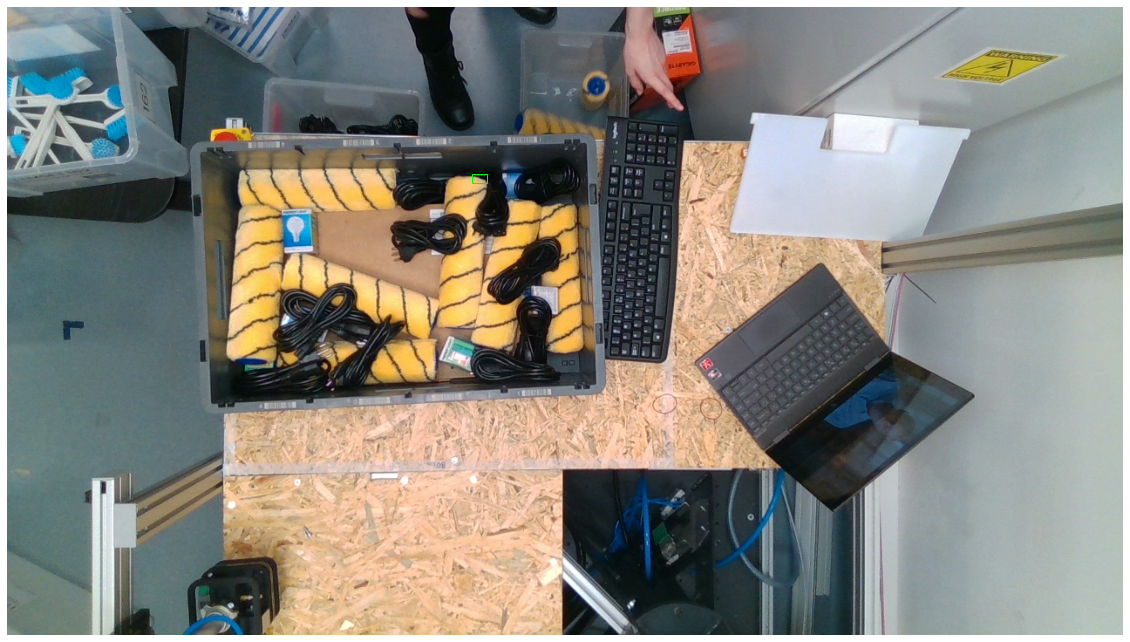

nomagic_digitec_cables


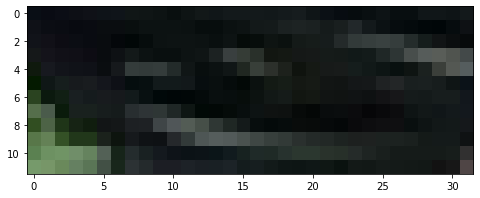

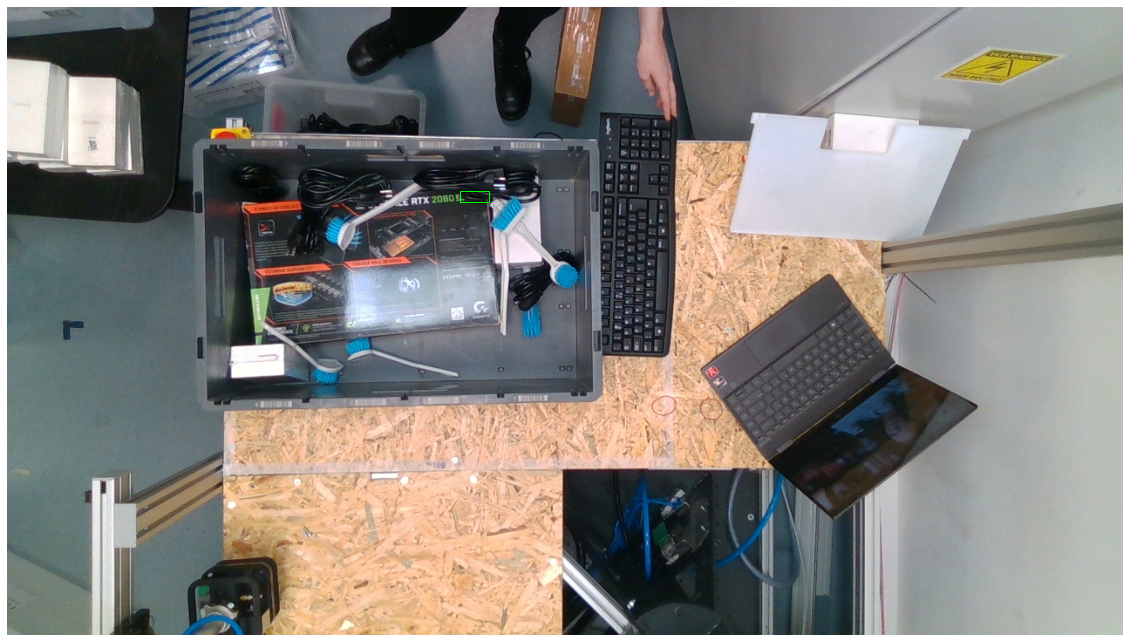

nomagic_digitec_cables


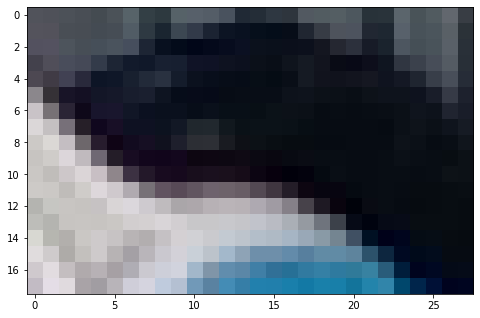

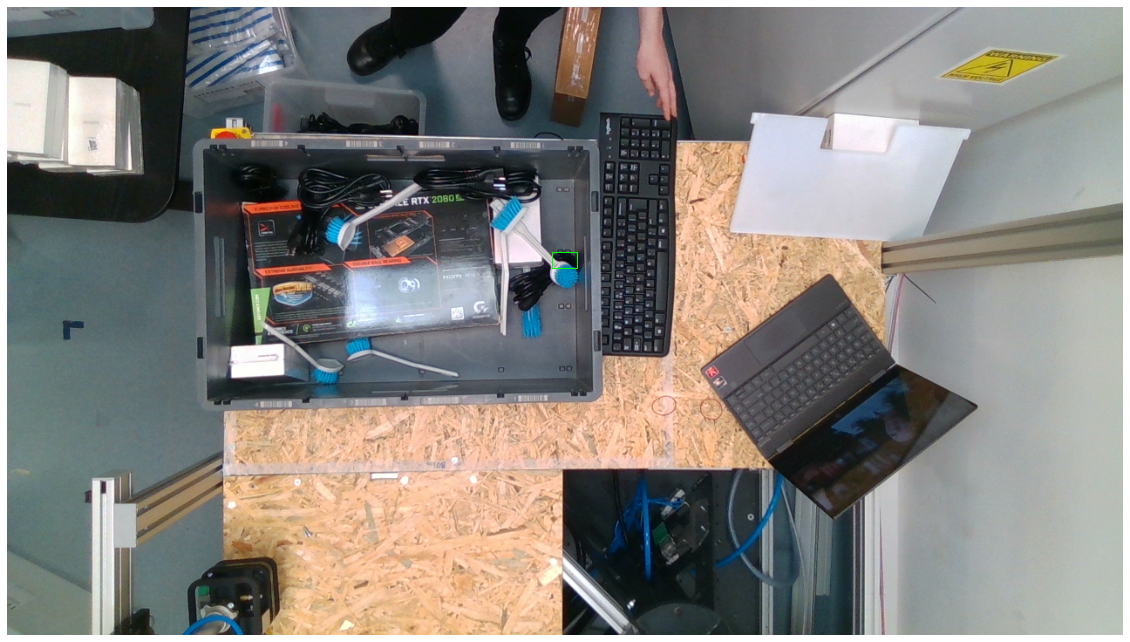

nomagic_digitec_cables


In [132]:
# small_img = small_img.reset_index()
i = 0
j = 0
for index, row in small_img.loc[(small_img['category_name'] == 'nomagic_digitec_cables')].iterrows():
    j += 1
    if j < 5:
        continue
    i += 1
    if i > 5:
        break
    cropped_img = cv.imread('cropped_val/'+row['crop_file_name'])
    cropped_img = cv.cvtColor(cropped_img, cv.COLOR_RGB2BGR)
    plt.figure(figsize=(8, 8))
    plt.imshow(cropped_img)
    plt.show()
    full_img = cv.imread('public_dataset/images_part1_valid/'+row['file_name'])
    full_img = cv.cvtColor(full_img, cv.COLOR_RGB2BGR)
    plt.figure(figsize=(20, 20))
    plt.imshow(full_img)

    coordinates = row['bbox']
    coordinates = json.loads(coordinates)
    x = coordinates[0]
    y = coordinates[1]
    width = coordinates[2]
    height = coordinates[3]
    plt.axis("off")
    ax = plt.gca()
    patch = plt.Rectangle([x, y], width, height, fill=False, edgecolor=[0, 1, 0], linewidth=1)
    ax.add_patch(patch)
    plt.show()
    print(row['category_name'])
